In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
 ds = pd.read_excel("/content/drive/MyDrive/RSI_Google Colabs/combined_raman_spectra (Experimental).xlsx")

 ds.head()

,Raman Shift,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt,AMUL TAZA TONED_BACTERIA_D2.txt,AMUL TONED_BACTERIA_D2.txt,HERITAGE FC LC -BACTERIA-D2.txt,HERITAGE FC-BACTERIA-D2.txt,HERITAGE SPECIAL_BACTERIA_D2.txt,HERITAGE TONED_BACTERIA_D2.txt,NANDHINI FC-BACTERIA-D2.txt,NANDHINI TONED_BACTERIA_D2.txt,NANDHINI TONED_NON BACTERIA_D2.txt,PROFESSOR.txt,SLIM_MILK_D2.txt
0,400.00000,953.83142,1064.7607,981.08990,1039.3268,1116.5341,1080.2765,1047.1913,956.10309,846.87677,1051.6011,936.33325,1181.1903
1,401.58487,960.85498,1066.0364,987.95337,1034.8542,1121.0610,1095.0671,1048.7076,957.82806,844.17969,1048.3557,935.11536,1178.8226
2,403.16974,956.39105,1062.1385,992.40369,1044.1107,1122.4965,1091.5408,1036.1937,953.45520,847.40948,1053.2606,938.29675,1175.2899
3,404.75461,951.03607,1067.4764,985.82019,1042.1935,1111.2114,1084.7375,1035.3439,955.29700,846.17572,1052.2838,935.38397,1189.9312
4,406.33948,952.53998,1059.1409,985.40033,1040.1716,1110.7845,1087.7617,1041.5126,954.53717,852.73822,1049.0034,935.15649,1184.6140


In [12]:
x = ds["Raman Shift"]

ds_intensities = ds.drop("Raman Shift", axis=1)

ds_intensities = savgol_filter(ds_intensities, 5 , 2)

ds_intensities = pd.DataFrame(ds_intensities , columns = ['AKSHAYA K-ALPHA FC_BACTERIA_D2.txt','AMUL TAZA TONED_BACTERIA_D2.txt' , 'AMUL TONED_BACTERIA_D2.txt' , 'HERITAGE FC LC -BACTERIA-D2.txt' , 'HERITAGE FC-BACTERIA-D2.txt' , 'HERITAGE SPECIAL_BACTERIA_D2.txt' , 'HERITAGE TONED_BACTERIA_D2.txt' , 'NANDHINI FC-BACTERIA-D2.txt' , 'NANDHINI TONED_BACTERIA_D2.txt' , 'NANDHINI TONED_NON BACTERIA_D2.txt' , 'PROFESSOR.txt' , 'SLIM_MILK_D2.txt'])

ds_intensities.head()

,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt,AMUL TAZA TONED_BACTERIA_D2.txt,AMUL TONED_BACTERIA_D2.txt,HERITAGE FC LC -BACTERIA-D2.txt,HERITAGE FC-BACTERIA-D2.txt,HERITAGE SPECIAL_BACTERIA_D2.txt,HERITAGE TONED_BACTERIA_D2.txt,NANDHINI FC-BACTERIA-D2.txt,NANDHINI TONED_BACTERIA_D2.txt,NANDHINI TONED_NON BACTERIA_D2.txt,PROFESSOR.txt,SLIM_MILK_D2.txt
0,981.751969,995.792599,1020.470907,1040.140914,1095.185020,1095.517589,1038.530702,931.055331,929.679478,938.967393,1020.657238,1157.800591
1,988.739539,999.012247,1021.718473,1040.496667,1100.203134,1105.009061,1044.772830,930.498746,927.822599,936.103872,1017.774552,1156.201642
2,982.202685,999.324169,1025.976871,1047.647037,1103.556181,1099.079380,1035.586485,925.073496,930.373697,941.361990,1020.907855,1152.634116
3,978.703197,998.956117,1025.378275,1040.715054,1095.722101,1091.620846,1034.545684,925.920587,930.393521,938.053037,1022.781352,1165.270969
4,978.180057,995.817217,1021.530919,1039.897925,1095.365637,1095.296794,1037.792357,929.938469,931.686552,939.152595,1021.438418,1159.781503


In [13]:
from scipy import sparse
from scipy.sparse.linalg import spsolve


def baseline_als(y, lam=10e6, p=0.01, niter=10):
    L = len(y)
    D = sparse.diags([1, -2, 1], [0, -1, -2], shape=(L, L-2), format='csc')
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.T)
        z = spsolve(Z, w * y)
        w = p * (y > z) + (1 - p) * (y < z)
    return z

z = ds_intensities.apply(lambda col: baseline_als(col.values, lam=1e6, p=0.01), axis=0)


ds_corrected = ds_intensities - z

ds_corrected.head()


,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt,AMUL TAZA TONED_BACTERIA_D2.txt,AMUL TONED_BACTERIA_D2.txt,HERITAGE FC LC -BACTERIA-D2.txt,HERITAGE FC-BACTERIA-D2.txt,HERITAGE SPECIAL_BACTERIA_D2.txt,HERITAGE TONED_BACTERIA_D2.txt,NANDHINI FC-BACTERIA-D2.txt,NANDHINI TONED_BACTERIA_D2.txt,NANDHINI TONED_NON BACTERIA_D2.txt,PROFESSOR.txt,SLIM_MILK_D2.txt
0,6.089664,23.740307,9.230611,3.902190,1.453751,4.772983,13.092422,11.136671,3.742273,9.616667,11.113577,7.479031
1,13.091442,26.848541,10.513221,4.379186,6.470513,14.264127,19.322967,10.550865,1.787166,6.644972,8.142430,5.890169
2,6.568796,27.049048,14.806663,11.650799,9.822208,8.334118,10.125038,5.096393,4.240036,11.794917,11.187272,2.332730
3,3.083516,26.569581,14.243110,4.840060,1.986776,0.875256,9.072654,5.914262,4.161631,8.377790,12.972307,14.979670
4,2.574583,23.319263,10.430797,4.144174,1.628961,4.550876,12.307742,9.902923,5.356433,9.369173,11.540911,9.500291


In [9]:
df = pd.concat([x, ds_corrected], axis=1)

df.head()

,Raman Shift,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt,AMUL TAZA TONED_BACTERIA_D2.txt,AMUL TONED_BACTERIA_D2.txt,HERITAGE FC LC -BACTERIA-D2.txt,HERITAGE FC-BACTERIA-D2.txt,HERITAGE SPECIAL_BACTERIA_D2.txt,HERITAGE TONED_BACTERIA_D2.txt,NANDHINI FC-BACTERIA-D2.txt,NANDHINI TONED_BACTERIA_D2.txt,NANDHINI TONED_NON BACTERIA_D2.txt,PROFESSOR.txt,SLIM_MILK_D2.txt
0,400.00000,6.089664,23.740307,9.230611,3.902190,1.453751,4.772983,13.092422,11.136671,3.742273,9.616667,11.113577,7.479031
1,401.58487,13.091442,26.848541,10.513221,4.379186,6.470513,14.264127,19.322967,10.550865,1.787166,6.644972,8.142430,5.890169
2,403.16974,6.568796,27.049048,14.806663,11.650799,9.822208,8.334118,10.125038,5.096393,4.240036,11.794917,11.187272,2.332730
3,404.75461,3.083516,26.569581,14.243110,4.840060,1.986776,0.875256,9.072654,5.914262,4.161631,8.377790,12.972307,14.979670
4,406.33948,2.574583,23.319263,10.430797,4.144174,1.628961,4.550876,12.307742,9.902923,5.356433,9.369173,11.540911,9.500291


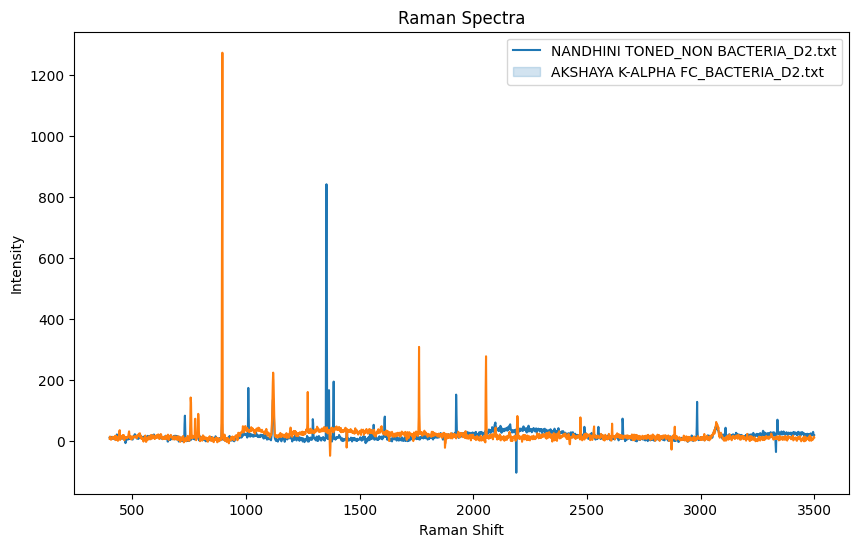

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x = "Raman Shift" , y = "NANDHINI TONED_NON BACTERIA_D2.txt" , data = df )
sns.lineplot(x = "Raman Shift" , y = "AKSHAYA K-ALPHA FC_BACTERIA_D2.txt" , data = df )
plt.legend(labels=["NANDHINI TONED_NON BACTERIA_D2.txt" , "AKSHAYA K-ALPHA FC_BACTERIA_D2.txt"])
plt.ylabel("Intensity")
plt.xlabel("Raman Shift")
plt.title("Raman Spectra")
plt.show()

In [20]:
df.to_excel("/content/drive/MyDrive/RSI_Google Colabs/preprocessed_raman_spectra (Experimental).xlsx")